In [1]:
#Load Libraries
import pandas as pd
import numpy as np

In [2]:
# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

In [3]:
#importing model libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing data
df = pd.read_csv(r"C:\Users\sudheepa\Downloads\Pune house data.csv")

In [6]:
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [7]:
df.shape

(13320, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [10]:
df.tail()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.0,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.0,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.0,Prabhat Road
13319,Super built-up Area,Ready To Move,1 BHK,NaN,550,1.0,1.0,17.0,Pune Railway Station


# Handle NA values

In [11]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [12]:
#remove unwanted columns
#The 'society' column is null for more than half of the number of rows. so,We cannot fill values for such  column. So let's drop the column
df= df.drop(['society'], axis='columns')
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [13]:
#again check null values
df.isnull().sum()
#balcony has more null values.

area_type          0
availability       0
size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [14]:
#checking count of unique values 
df.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [15]:
# Applying median to the balcony and bath column
from math import floor

balcony_median = float(floor(df.balcony.median()))
bath_median = float(floor(df.bath.median()))

df.balcony = df.balcony.fillna(balcony_median)
df.bath = df.bath.fillna(bath_median)

# Checking the null values in the dataset again



In [16]:
df.isnull().sum()

area_type         0
availability      0
size             16
total_sqft        0
bath              0
balcony           0
price             0
site_location     1
dtype: int64

In [17]:
df[df['site_location'].isna()]

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
1728,Super built-up Area,Ready To Move,2 BHK,920,2.0,0.0,35.0,NaN


In [18]:
#droping the specific row
df.drop(1728,inplace=True)

In [19]:
#drop other null rows from the data.
df=df.dropna()
df.shape

(13303, 8)

In [20]:
df.isnull().sum()
#now dataset has no null values.

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

# Data Cleaning Process

In [21]:
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [22]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [23]:
#checking size column
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
#create new columns to only pic number from size and name it as bhk.
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [25]:
#now,drop the size column
df = df.drop('size', axis='columns')

In [26]:
df['bhk'].unique()
#there are houses which contains more than 20 rooms.

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [27]:
#there are houses which contains more than 20 rooms. Lets check them how many houses are there.

df[df.bhk>20]

,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk
1718,Super built-up Area,Ready To Move,8000,27.0,0.0,230.0,Uruli Devachi,27
4684,Plot Area,Ready To Move,2400,40.0,0.0,660.0,Salunke Vihar,43


In [28]:
#checking total_sqft columns.
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
# Since the total_sqft contains range values such as 1133-1384, lets filter out these values
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

# Displaying all the rows that are not integers
df[~df['total_sqft'].apply(isFloat)]

,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk
30,Super built-up Area,19-Dec,2100 - 2850,4.0,0.0,186.000,Gultekdi,4
56,Built-up Area,20-Feb,3010 - 3410,2.0,2.0,192.000,Model colony,4
81,Built-up Area,18-Oct,2957 - 3450,2.0,2.0,224.500,Shukrawar Peth,4
122,Super built-up Area,18-Mar,3067 - 8156,4.0,0.0,477.000,Ganeshkhind,4
137,Super built-up Area,19-Mar,1042 - 1105,2.0,0.0,54.005,Khadaki,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar,3
13059,Super built-up Area,Ready To Move,1200 - 1470,2.0,0.0,72.760,Anandnagar,2
13240,Super built-up Area,Ready To Move,1020 - 1130,2.0,2.0,52.570,Vadgaon Budruk,1
13265,Super built-up Area,20-Sep,1133 - 1384,2.0,0.0,59.135,Dapodi,2


In [30]:
# Converting the range values to integer values and removing other types of error
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
df['Total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.drop('total_sqft', axis='columns')
df.head()

,area_type,availability,bath,balcony,price,site_location,bhk,Total_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0


In [31]:
# Removing the rows in new_total_sqft column that hase None values
df.isna().sum()

area_type         0
availability      0
bath              0
balcony           0
price             0
site_location     0
bhk               0
Total_sqft       46
dtype: int64

In [32]:
df = df.dropna()
df.isnull().sum()

area_type        0
availability     0
bath             0
balcony          0
price            0
site_location    0
bhk              0
Total_sqft       0
dtype: int64

# Feature Engineering

In [33]:
# Adding a new column of price_per_sqft
df = df.copy()

# In our dataset the price column is in Lakhs
df['price_per_sqft'] = (df['price']*100000)/df['Total_sqft']
df.head()

,area_type,availability,bath,balcony,price,site_location,bhk,Total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [34]:
# Checking unique values of 'location' column
locations = list(df['site_location'].unique())
print(len(locations))

97


In [35]:
# Removing the extra spaces at the end
df.site_location = df.site_location.apply(lambda x: x.strip())

In [36]:
# Calulating all the unqiue values in 'site_location' column
location_stats = df.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

site_location
Mangalwar peth          139
Khadaki                 139
Kondhwa                 139
Narayan Peth            139
Pune Railway Station    139
                       ... 
Wakadewadi              136
Narayangaon             136
Warje                   136
Nagar Road              136
other                     1
Name: site_location, Length: 97, dtype: int64

In [37]:
# Checking locations with less than 10 values
print(len(location_stats[location_stats<=10]), len(df.site_location.unique()))

1 97


In [38]:
# Labelling the locations with less than or equal to 10 occurences to 'other'_ else x)
locations_less_than_10 = location_stats[location_stats<=10]

df.site_location = df.site_location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df.site_location.unique())

97

In [39]:
# Checking the unique values in 'availability column'
df.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

availability
Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
16-Oct               1
16-Nov               1
16-Jul               1
16-Jan               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

In [40]:
len(df.availability.unique())

80

In [41]:
def month(x):
    if x=='Ready To Move':
        return 0
    return x.split('-')[1]
df['month'] = df['availability'].apply(month)

In [42]:
df.drop('availability',axis=1,inplace=True)

In [43]:
df

,area_type,bath,balcony,price,site_location,bhk,Total_sqft,price_per_sqft,month
0,Super built-up Area,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606,Dec
1,Plot Area,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615,0
2,Built-up Area,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556,0
3,Super built-up Area,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861,0
4,Super built-up Area,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000,0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,4.0,0.0,231.00,Pashan,5,3453.0,6689.834926,0
13316,Super built-up Area,5.0,2.0,400.00,Paud Road,4,3600.0,11111.111111,0
13317,Built-up Area,2.0,1.0,60.00,Pirangut,2,1141.0,5258.545136,0
13318,Super built-up Area,4.0,1.0,488.00,Prabhat Road,4,4689.0,10407.336319,Jun


In [44]:
# Checking the unique values in 'area_type' column
df.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)
# Since the column has only few unique values, we don't perform any operation

area_type
Super built-up  Area    8778
Built-up  Area          2402
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

In [45]:
df['bath'].unique()
#there is 40 bathrooms, it is unusual but in this data there 40bhk house also there,so leave this.

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [46]:
df.head()

,area_type,bath,balcony,price,site_location,bhk,Total_sqft,price_per_sqft,month
0,Super built-up Area,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606,Dec
1,Plot Area,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615,0
2,Built-up Area,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556,0
3,Super built-up Area,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861,0
4,Super built-up Area,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000,0


# Exploratory Data Analysis

In [47]:
# Exploring the dataset
df.shape

(13257, 9)

In [48]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2402
Carpet  Area              86
Plot  Area              1991
Super built-up  Area    8778
Name: area_type, dtype: int64

(0.0, 1000.0)

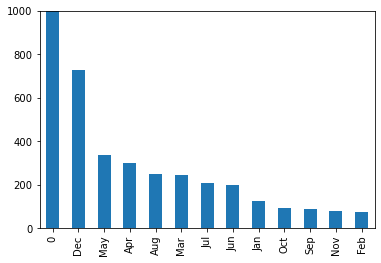

In [49]:
df['month'].value_counts().plot(kind='bar')
plt.ylim(0,1000)

In [50]:
df.groupby('month').mean()['price'].sort_values()

month
Aug     69.888145
Nov     71.347911
Oct     84.513626
Jun     89.660650
Dec     95.134044
Apr     99.505705
May    105.861484
Jul    107.537767
0      115.062386
Sep    115.088793
Mar    120.244588
Feb    123.664533
Jan    195.820640
Name: price, dtype: float64

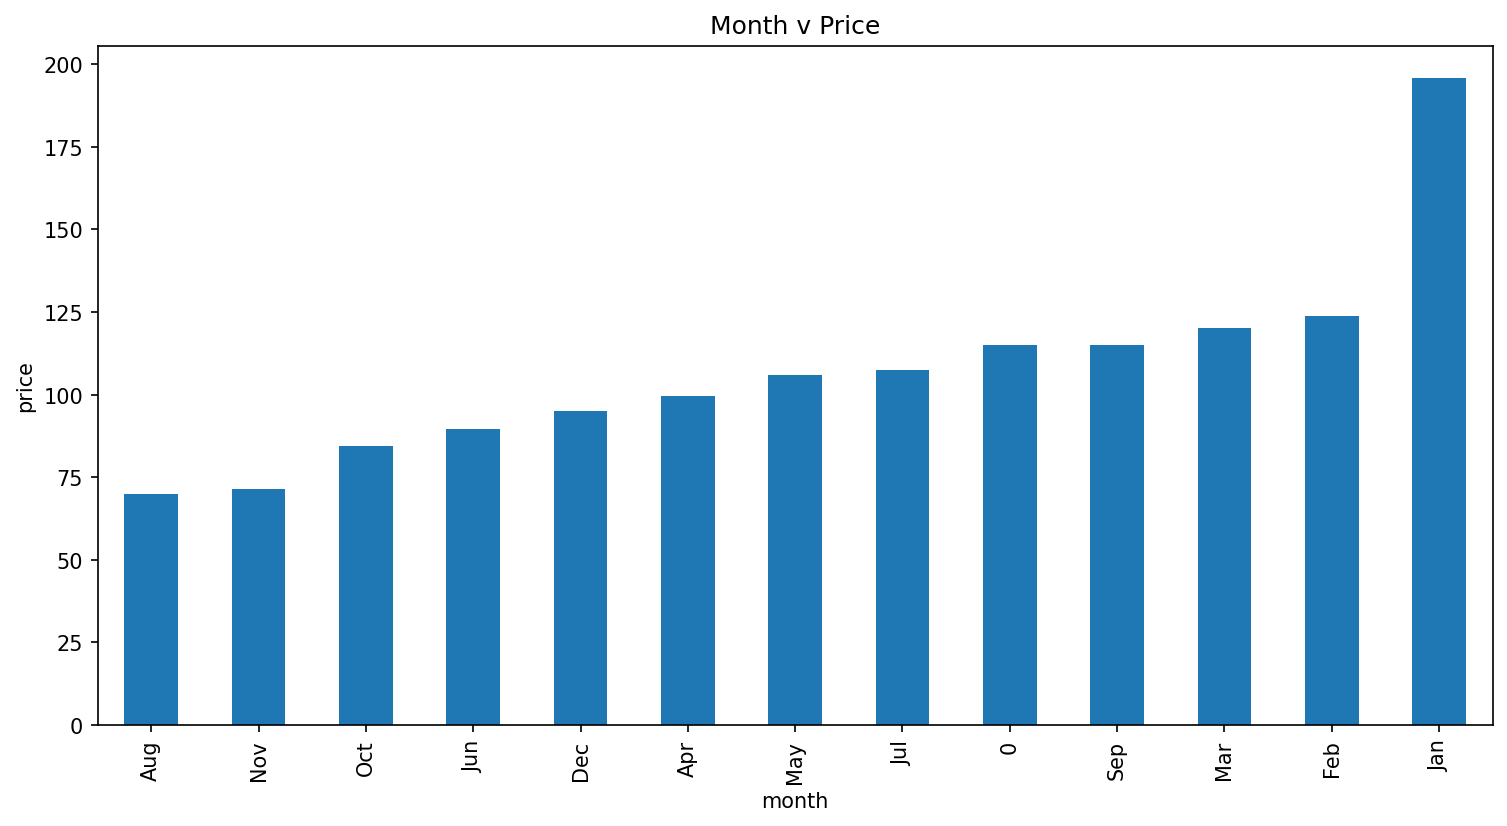

In [51]:
plt.figure(figsize=(12,6),dpi=150)
df.groupby('month').mean()['price'].sort_values().plot(kind='bar')
plt.ylabel('price')
plt.title('Month v Price');

The above plot is a very important plot. This plot clearly shows the price dependence on month

In [52]:
month_to_ord = {'Jan':12,'Feb':11,'Mar':10,'Sep':9,0:8,'Jul':7,'May':6,'Apr':5,'Dec':4,'Jun':3,'Oct':2,'Nov':1,'Aug':0}
df['monthImp'] = df['month'].map(month_to_ord)

In [53]:
df.groupby('bhk')['bhk'].agg('count')

bhk
1      647
2     5517
3     4843
4     1412
5      352
6      220
7      100
8       88
9       52
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [54]:
df.groupby('site_location')['site_location'].agg('count')

site_location
Alandi Road        138
Ambegaon Budruk    139
Anandnagar         139
Aundh              137
Aundh Road         139
                  ... 
Wakadewadi         136
Wanowrie           138
Warje              136
Yerawada           137
other                1
Name: site_location, Length: 97, dtype: int64

In [55]:
df.corr().iloc[:-1,:-1]

,bath,balcony,price,bhk,Total_sqft,price_per_sqft
bath,1.000000,0.207721,0.454319,0.895275,0.389838,0.030902
balcony,0.207721,1.000000,0.124968,0.194238,0.154235,0.009331
price,0.454319,0.124968,1.000000,0.397946,0.575623,0.028372
bhk,0.895275,0.194238,0.397946,1.000000,0.348131,0.030904
Total_sqft,0.389838,0.154235,0.575623,0.348131,1.000000,-0.008247
price_per_sqft,0.030902,0.009331,0.028372,0.030904,-0.008247,1.000000


In [56]:
df.groupby('area_type').describe().transpose().loc['price']

area_type,Built-up Area,Carpet Area,Plot Area,Super built-up Area
count,2402.000000,86.000000,1991.000000,8778.000000
mean,104.013736,90.333779,209.714771,92.952865
std,109.267998,73.463813,254.691937,113.996647
min,9.000000,13.000000,10.500000,8.000000
25%,46.625000,48.500000,85.000000,47.250000
50%,70.000000,70.000000,140.000000,65.000000
75%,120.000000,100.000000,240.000000,98.000000
max,2050.000000,500.000000,3600.000000,2912.000000


<AxesSubplot:xlabel='area_type', ylabel='price'>

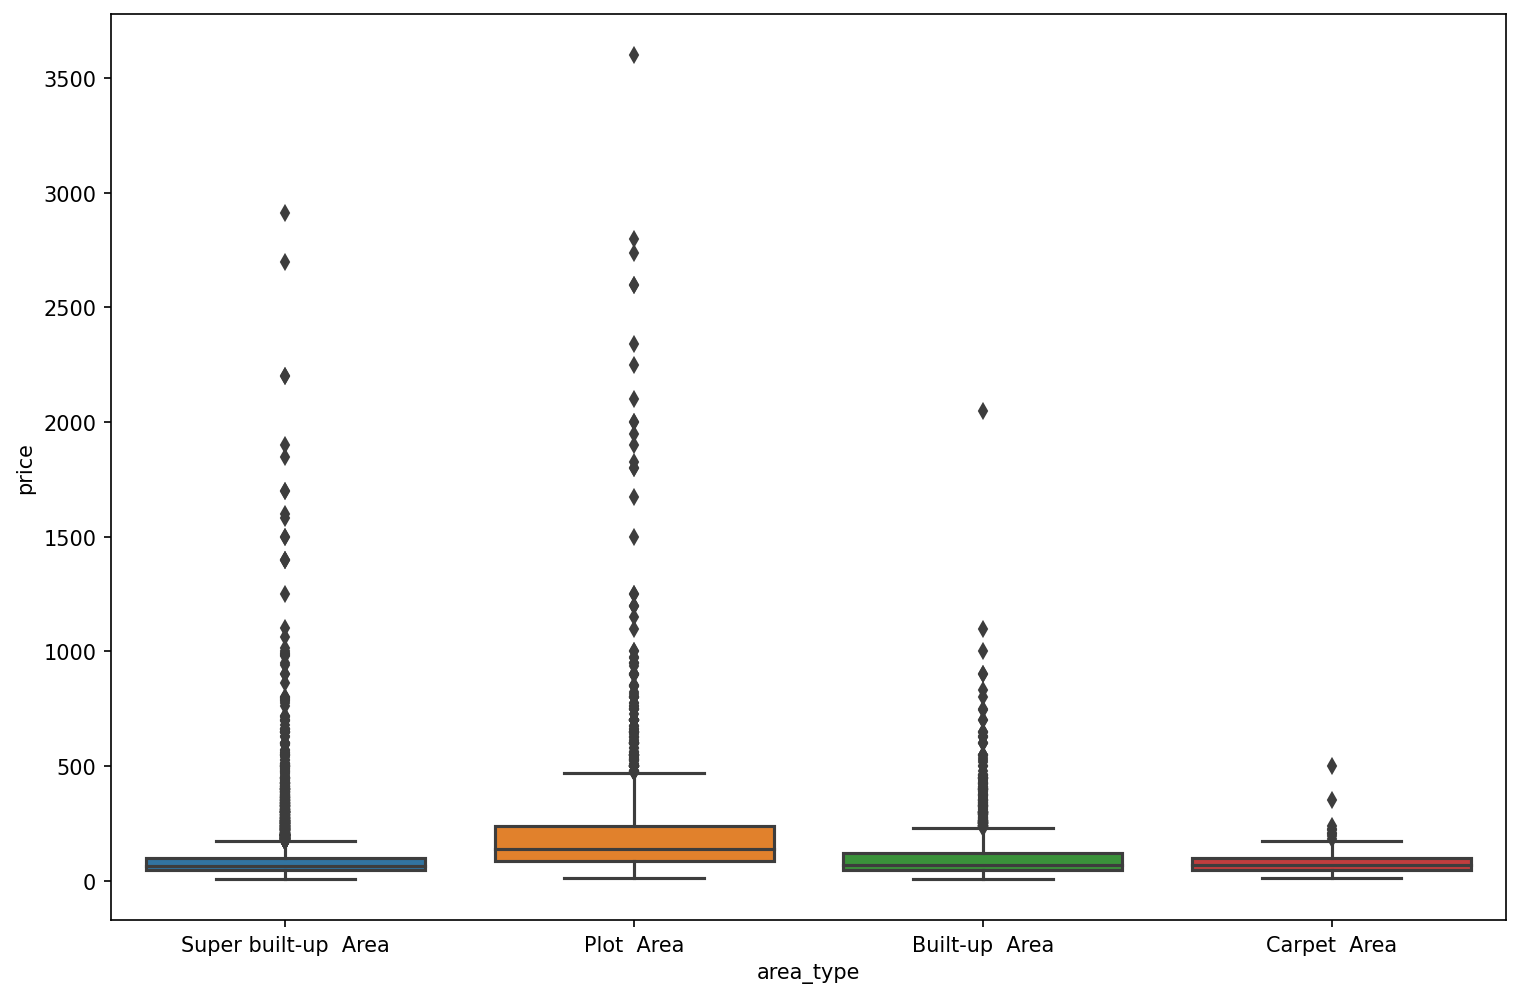

In [57]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='area_type',y='price',data=df)

#we can find four outliers. Two for 'Super built-up' and one each for 'Plot' and 'Built-up'. We can eliminate them

In [58]:
df.drop(df[df['area_type']=='Plot  Area']['price'].idxmax(),inplace=True)

In [59]:
df.drop(df[df['area_type']=='Built-up  Area']['price'].idxmax(),inplace=True)

In [60]:
df.drop(df[df['area_type']=='Super built-up  Area']['price'].idxmax(),inplace=True) 

<AxesSubplot:xlabel='area_type', ylabel='price'>

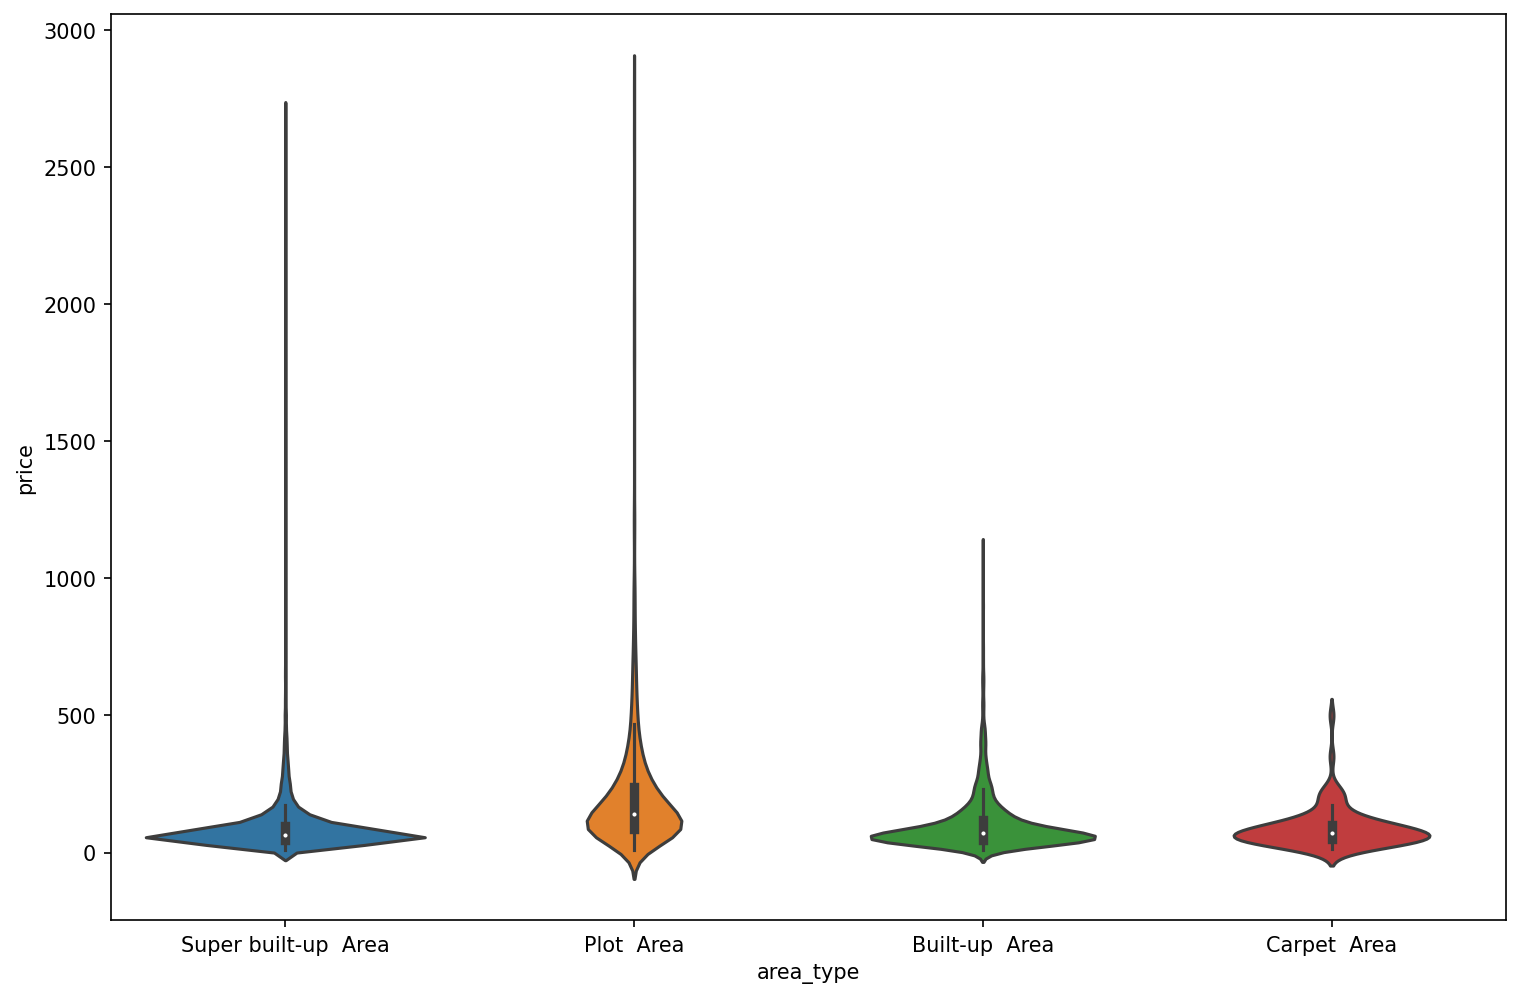

In [61]:
plt.figure(figsize=(12,8),dpi=150)
sns.violinplot(x='area_type',y='price',data=df)

In [62]:
#outliers are found in only numeric columns.
#note there is usual sqft of 1bhk is more than 300. check whether is any less than 300.
df[df.Total_sqft/df.bhk<300]

,area_type,bath,balcony,price,site_location,bhk,Total_sqft,price_per_sqft,month,monthImp
9,Plot Area,6.0,2.0,370.0,Bhavani Peth,6,1020.0,36274.509804,0,8
45,Plot Area,9.0,2.0,200.0,Kondhwa Budruk,8,600.0,33333.333333,0,8
58,Plot Area,4.0,1.0,150.0,Mundhawa,6,1407.0,10660.980810,0,8
68,Plot Area,7.0,0.0,85.0,Pirangut,8,1350.0,6296.296296,0,8
70,Plot Area,3.0,2.0,100.0,Pune Railway Station,3,500.0,20000.000000,0,8
...,...,...,...,...,...,...,...,...,...,...
13277,Plot Area,7.0,2.0,218.0,Ghorpadi,7,1400.0,15571.428571,0,8
13279,Plot Area,5.0,2.0,130.0,Gultekdi,6,1200.0,10833.333333,0,8
13281,Plot Area,5.0,1.0,125.0,Hadapsar,5,1375.0,9090.909091,0,8
13303,Plot Area,5.0,3.0,70.0,Manik Bagh,5,774.0,9043.927649,0,8


In [63]:
df = df[~(df.Total_sqft/df.bhk<300)]

In [64]:
df.shape

(12510, 10)

In [65]:
df.price_per_sqft.describe()
#min is 267 
#max is 176470, it is unbelivable for one sqft.

count     12510.000000
mean       6299.916610
std        4129.642404
min         267.829813
25%        4210.762120
50%        5294.736984
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [66]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(10913, 10)

In [67]:
%matplotlib inline
import matplotlib 
matplotlib.rcParams['figure.figsize']=(15,7)

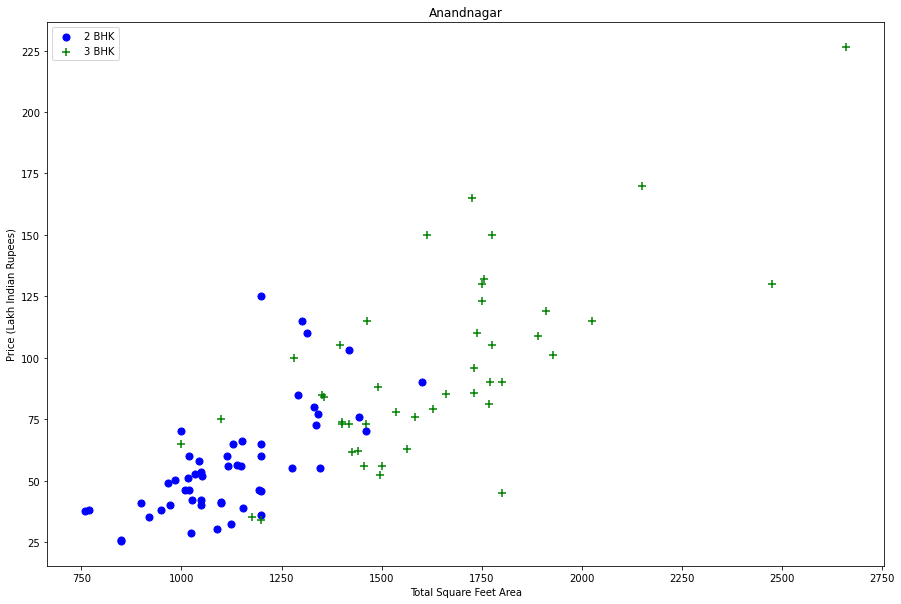

In [68]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Anandnagar")
#some house price have 3 bhk there prices are less than 2 bhk house.

In [69]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis ='index')

df= remove_bhk_outliers(df)
df.shape

(7464, 10)

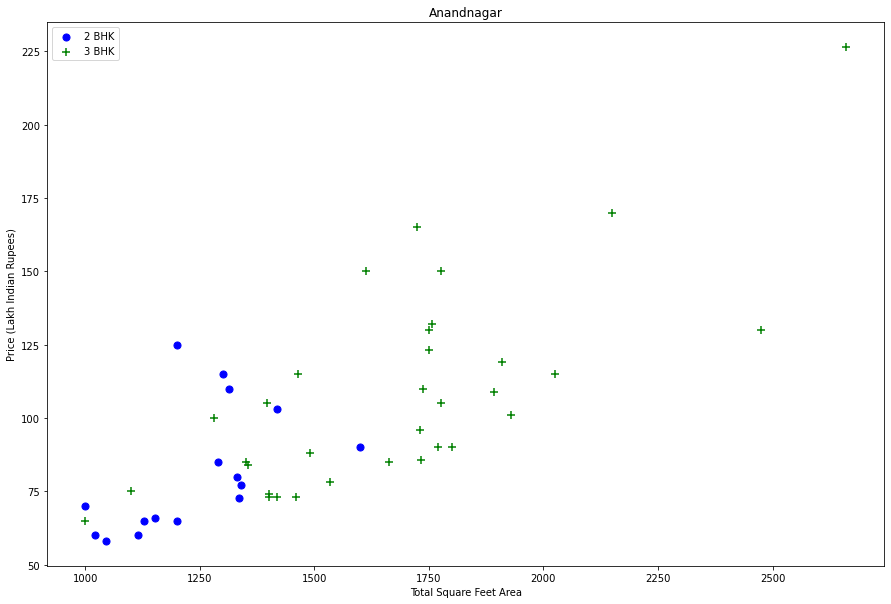

In [70]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Anandnagar")
#some outliers are removed.


In [71]:
df.shape

(7464, 10)

Text(0, 0.5, 'Count')

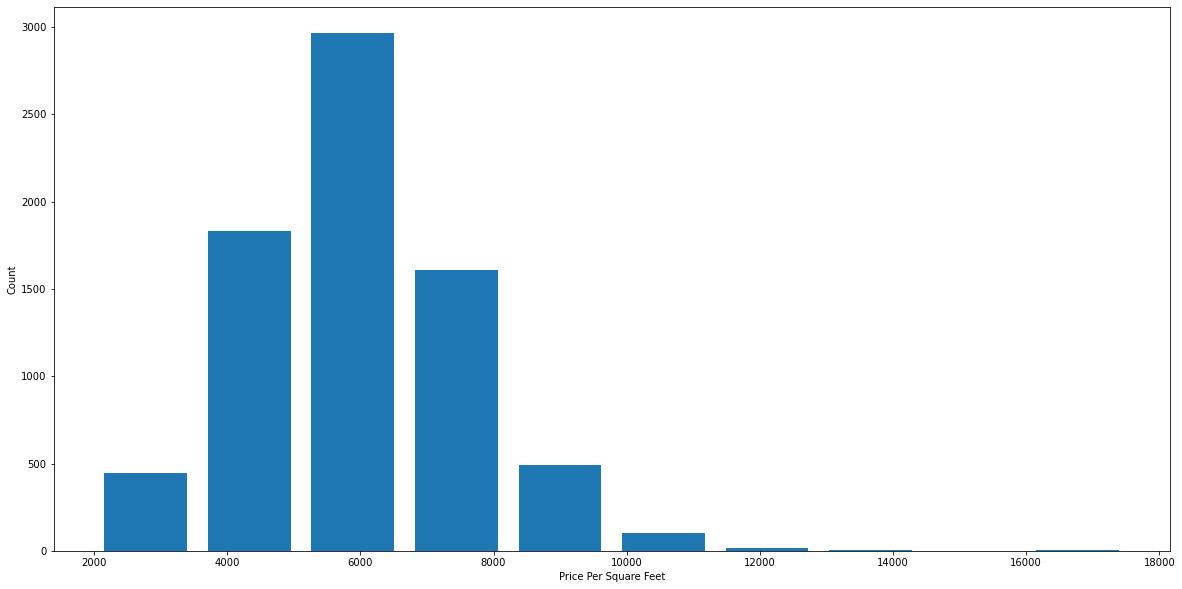

In [72]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [73]:
df.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

Text(0, 0.5, 'count')

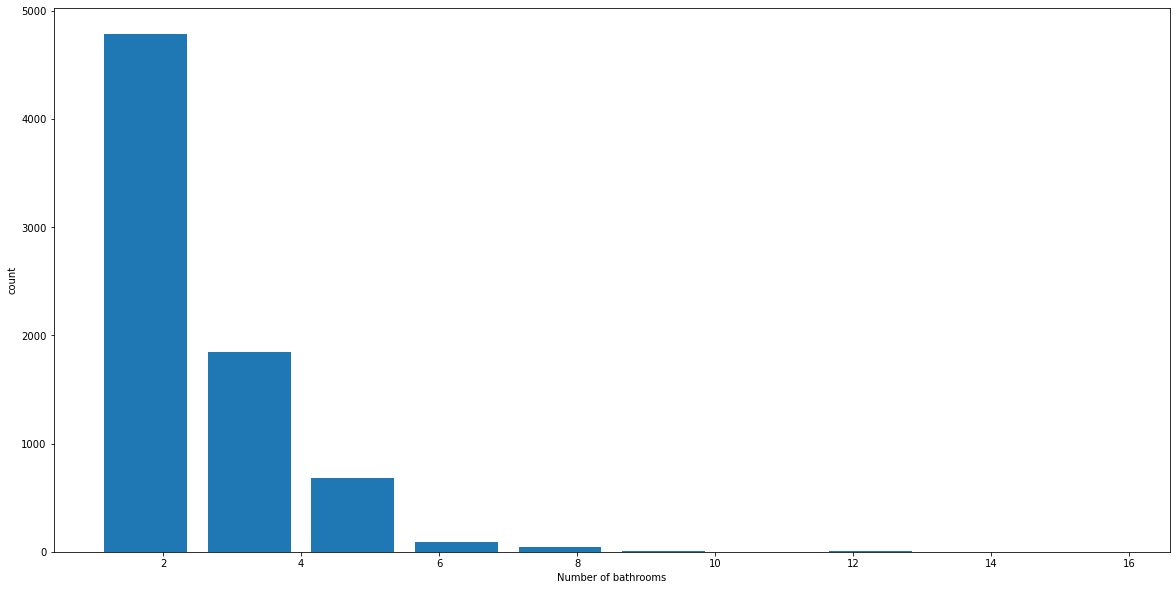

In [74]:
plt.hist(df.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('count')

In [75]:
df[df.bath>10]

,area_type,bath,balcony,price,site_location,bhk,Total_sqft,price_per_sqft,month,monthImp
1216,Super built-up Area,12.0,2.0,150.0,Bibvewadi,11,6000.0,2500.000000,0,8
2647,Super built-up Area,12.0,2.0,525.0,Fatima Nagar,10,12000.0,4375.000000,0,8
5268,Super built-up Area,13.0,0.0,275.0,Kondhwa Khurd,13,5425.0,5069.124424,0,8
6360,Super built-up Area,16.0,2.0,550.0,Model colony,16,10000.0,5500.000000,0,8
10414,Super built-up Area,12.0,2.0,160.0,Wagholi,10,4000.0,4000.000000,0,8


In [76]:
#some house have bathrooms more than rooms, it is belivable if 1 extra is there, but if more 1 extra is unbelivable.

df[df.bath>df.bhk+2]

#is there. drop them.

,area_type,bath,balcony,price,site_location,bhk,Total_sqft,price_per_sqft,month,monthImp
776,Super built-up Area,6.0,2.0,116.0,Baner,3,1806.0,6423.034330,0,8
3082,Super built-up Area,9.0,1.0,1000.0,Ghorpade Peth,6,11338.0,8819.897689,0,8
4245,Built-up Area,8.0,2.0,450.0,Karve Nagar,4,7000.0,6428.571429,0,8


In [77]:
df= df[df.bath<df.bhk+2]

In [78]:
df.shape

(7399, 10)

In [79]:
df.head()

,area_type,bath,balcony,price,site_location,bhk,Total_sqft,price_per_sqft,month,monthImp
0,Super built-up Area,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606,Dec,4
1,Plot Area,4.0,1.0,245.00,Alandi Road,4,2894.0,8465.791292,0,8
2,Super built-up Area,2.0,2.0,50.00,Alandi Road,2,1084.0,4612.546125,0,8
3,Super built-up Area,2.0,2.0,80.00,Alandi Road,2,1230.0,6504.065041,0,8
4,Super built-up Area,3.0,2.0,130.00,Alandi Road,3,1750.0,7428.571429,0,8


In [80]:
#all data are clear now.
#remove price_per_sqft.
df = df.drop('price_per_sqft', axis='columns')


In [81]:
df.head()

,area_type,bath,balcony,price,site_location,bhk,Total_sqft,month,monthImp
0,Super built-up Area,2.0,1.0,39.07,Alandi Road,2,1056.0,Dec,4
1,Plot Area,4.0,1.0,245.00,Alandi Road,4,2894.0,0,8
2,Super built-up Area,2.0,2.0,50.00,Alandi Road,2,1084.0,0,8
3,Super built-up Area,2.0,2.0,80.00,Alandi Road,2,1230.0,0,8
4,Super built-up Area,3.0,2.0,130.00,Alandi Road,3,1750.0,0,8


# Data Visualization

<AxesSubplot:>

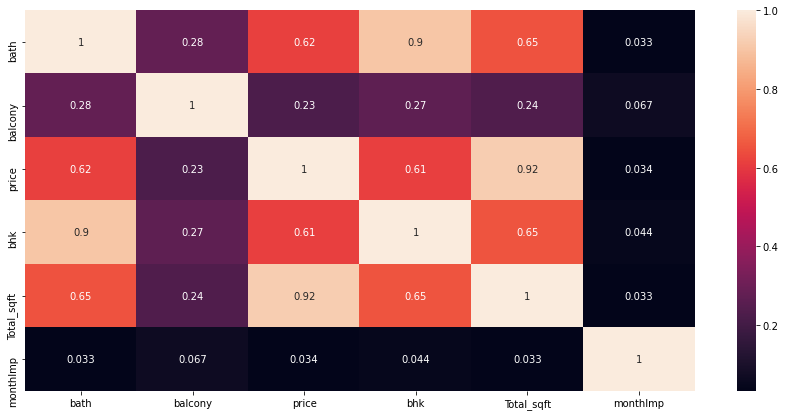

In [82]:
plt.figure(figsize=(15,7))
sns.heatmap(data=df.corr(), annot=True)

<AxesSubplot:>

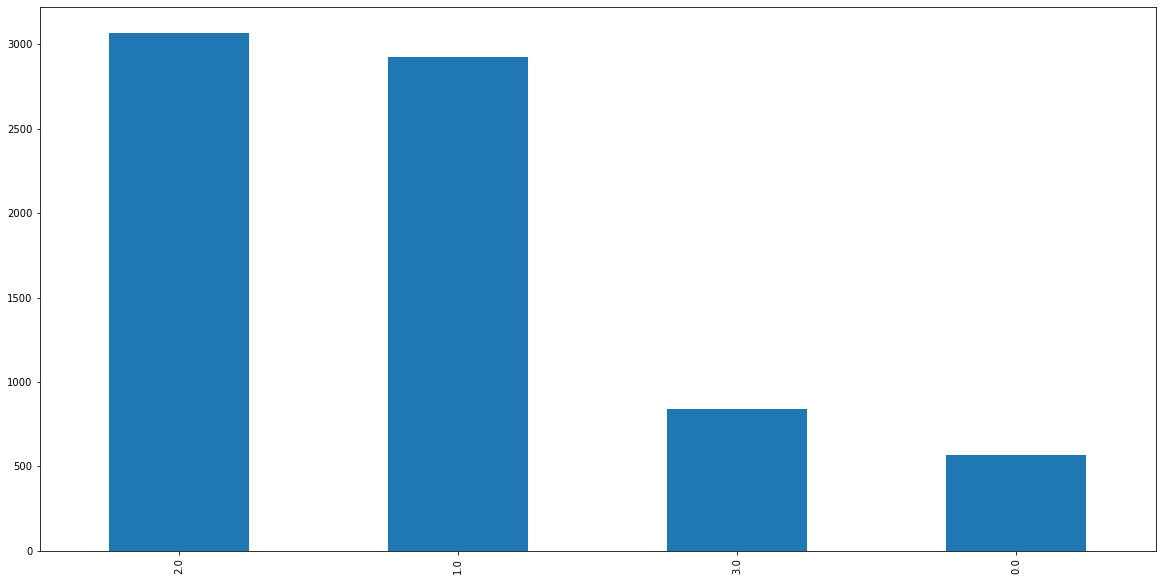

In [83]:
df['balcony'].value_counts().plot(kind='bar')

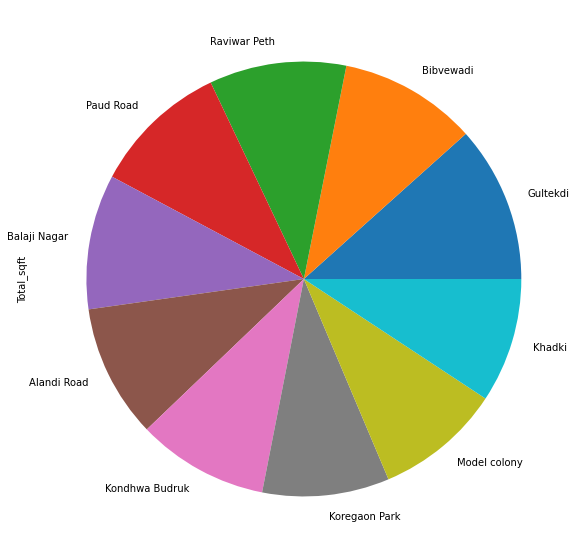

In [84]:
plt.figure(figsize=(10 ,10))
df.groupby(['site_location']).sum().Total_sqft.nlargest(10).plot(kind='pie')
plt.show()

In [85]:
from matplotlib.gridspec import GridSpec

<AxesSubplot:xlabel='price', ylabel='Count'>

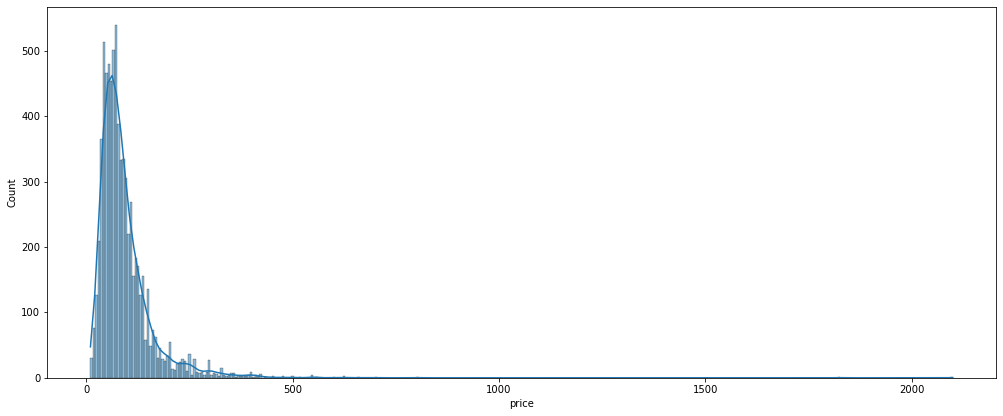

In [86]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(df['price'], ax=ax1, kde=True)

<AxesSubplot:xlabel='bhk', ylabel='Count'>

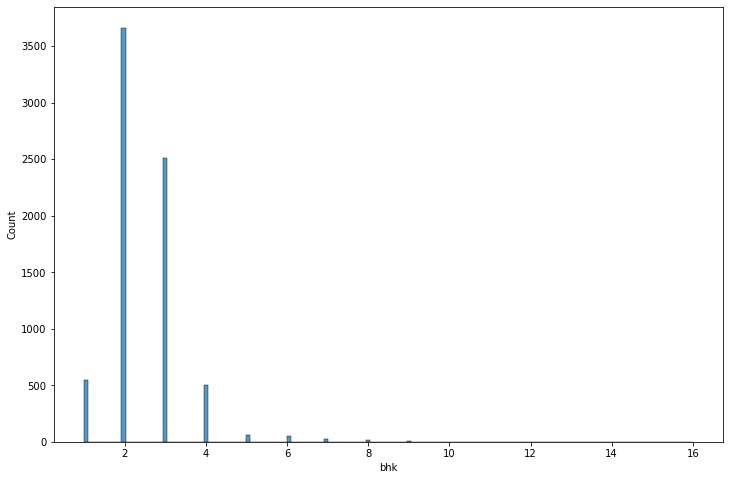

In [87]:
#bedrooms graph
fig = plt.figure(figsize=(12, 8))
sns.histplot(df.bhk)

<AxesSubplot:xlabel='bath', ylabel='count'>

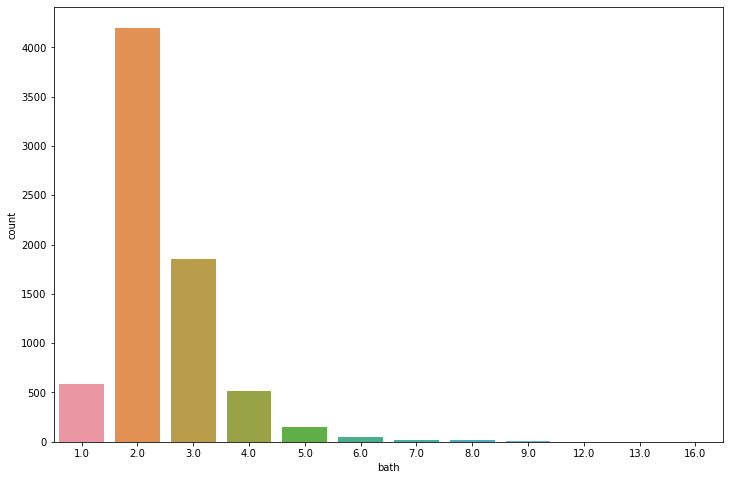

In [88]:
#bathrooms graph
fig = plt.figure(figsize=(12, 8))
sns.countplot(x=df['bath'])

In [89]:
df.drop('month',axis=1,inplace=True)

In [90]:
df.drop('monthImp',axis=1,inplace=True)

# One-hot encoding

In [91]:
df.columns

Index(['area_type', 'bath', 'balcony', 'price', 'site_location', 'bhk',
       'Total_sqft'],
      dtype='object')

In [92]:
df.shape

(7399, 7)

In [93]:
location_dummies = pd.get_dummies(df.site_location)
location_dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
area_type_dummies=pd.get_dummies(df.area_type)
area_type_dummies.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [95]:
df = pd.concat([df, location_dummies.drop('Yerawada', axis='columns'), area_type_dummies.drop('Built-up  Area', axis='columns')], axis='columns')
df.head()

,area_type,bath,balcony,price,site_location,bhk,Total_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,...,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,2.0,1.0,39.07,Alandi Road,2,1056.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Plot Area,4.0,1.0,245.00,Alandi Road,4,2894.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Super built-up Area,2.0,2.0,50.00,Alandi Road,2,1084.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Super built-up Area,2.0,2.0,80.00,Alandi Road,2,1230.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Super built-up Area,3.0,2.0,130.00,Alandi Road,3,1750.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
df = df.drop(['site_location','area_type'],axis='columns')
df.head(3)

,bath,balcony,price,bhk,Total_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Carpet Area,Plot Area,Super built-up Area
0,2.0,1.0,39.07,2,1056.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.0,1.0,245.00,4,2894.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,2.0,50.00,2,1084.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
df.shape

(7399, 103)

# Model building

In [98]:
X = df.drop('price', axis='columns')
X.head()

,bath,balcony,bhk,Total_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Carpet Area,Plot Area,Super built-up Area
0,2.0,1.0,2,1056.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.0,1.0,4,2894.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,2.0,2,1084.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,2.0,2,1230.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,2.0,3,1750.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
y=df.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [101]:
#testing linear regression algorithm
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8772337999577324

In [102]:
y_pred=lr_clf.predict(X_test)

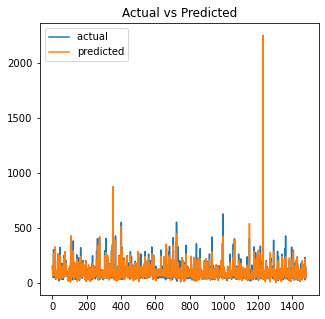

In [103]:
#actual and predicted values
dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.figure(figsize = (5, 5))
display(plt.plot(x_axis, y_axis))
display(plt.plot(x_axis,y1_axis))
#plt.plot(x_axis,y_axis)
#plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [104]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82924064, 0.90867681, 0.77815997, 0.79206507, 0.81781175])

Find best model using GridSearchCV

In [105]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.825191,{'normalize': False}
1,lasso,0.820644,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.768646,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [106]:
df.columns

Index(['bath', 'balcony', 'price', 'bhk', 'Total_sqft', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road',
       ...
       'Viman Nagar', 'Vishrant Wadi', 'Wadgaon Sheri', 'Wagholi',
       'Wakadewadi', 'Wanowrie', 'Warje', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'],
      dtype='object', length=103)

linear regression is the best fit model

In [107]:
def predict_price(bath,balcony,bhk,sqft,location):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3]=sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [108]:
predict_price(2,1,3,1000,'Alandi Road')

47.91174764149832

In [109]:
predict_price(3,3,3,1000,'Viman Nagar')

61.34523226889712

In [110]:
predict_price(2,1,3,1500,"Vishrant Wadi")

93.9330031940596

In [ ]:
predict_price(1,)

In [111]:
predict_price(2,3,3,2000,'Wagholi')

121.23625402354074

In [112]:
predict_price(3,1,4,1000,'Aundh Road')

56.458015510916

Export the tested model to a pickle file

In [113]:
import pickle
with open('pune_house_price.pickle','wb') as f:
    pickle.dump(lr_clf,f)

Exporting location and column information to a file that will be useful later on in our prediction application

In [114]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))